In [1]:

## import statements for the regression pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# import scaling methods
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# import modeling methods
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from scipy import stats

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

import acquire as a 
import prepare as p
import model as m

### Acquire 

First step is to download the kaggle.com dataset into a local csv within my project repository.

Second step is to load the local csv into a pandas dataframe for easy manipulation for during prepare and explore to improve the end goal of the modeling portion: to predict the sale price of each real estate property.

Dataset Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
## using the acquire function to load the local csv into a pandas dataframe

df = a.acquire_housing_data()

In [3]:
## previewing the dataframe
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape ## taking a look at the shape of the dataframe

(1460, 80)

There are a limited amount of observations with only 1460. This means I will have to careful on what decision is made to deal with null values and outliers.

Let's take a look at the columns and their data types

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Looks like there are some nulls in certain columns that will need to be dealt with in the prepare phase.

In [6]:
## using the acquire function to create a stats dataframe with a range column

stats = a.create_stats(df)

stats ## previewing the numerical statistics

,count,mean,std,min,25%,50%,75%,max,range
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,170.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,292.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,213945.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,9.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,8.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,138.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,60.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,1474.0


Now that I have taken a look at all the numerical statistics. Lets take a look at the distributions of most of the columns to check for normalcy or skewed distributions before I start cleaning up the dataframe in preparation for exlporation and modeling

Distribution of MSSubClass



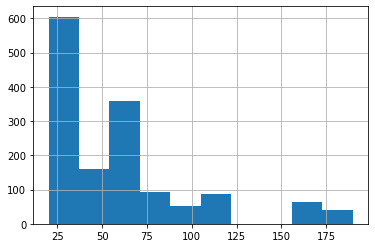

--------------------
Distribution of MSZoning



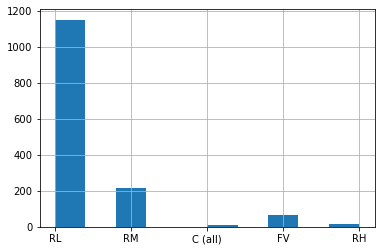

--------------------
Distribution of LotFrontage



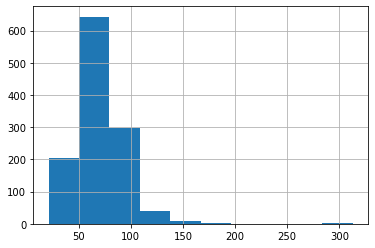

--------------------
Distribution of LotArea



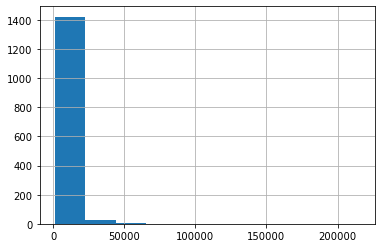

--------------------
Distribution of Street



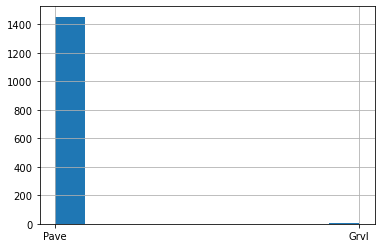

--------------------
Distribution of Alley



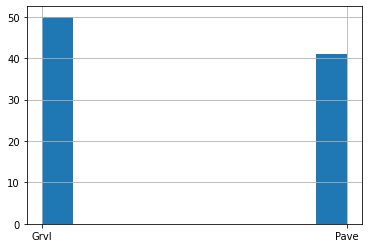

--------------------
Distribution of LotShape



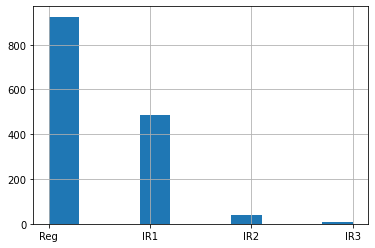

--------------------
Distribution of LandContour



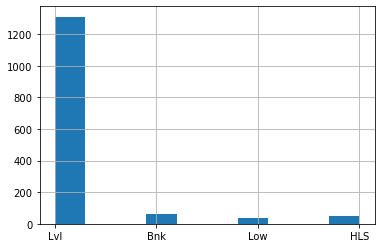

--------------------
Distribution of Utilities



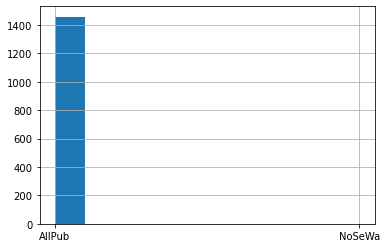

--------------------
Distribution of LotConfig



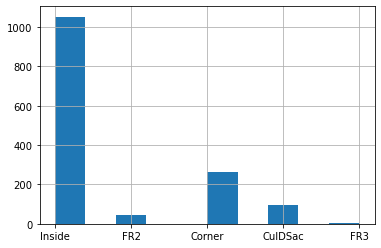

--------------------
Distribution of LandSlope



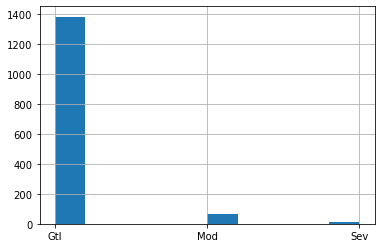

--------------------
Distribution of Neighborhood



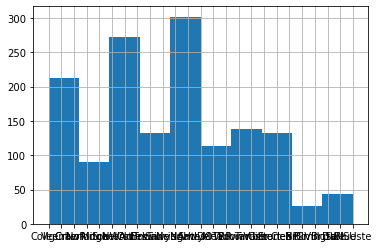

--------------------
Distribution of Condition1



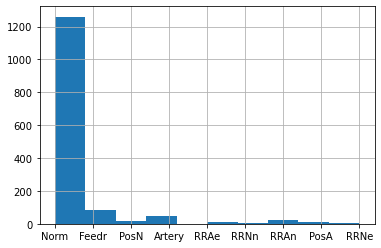

--------------------
Distribution of Condition2



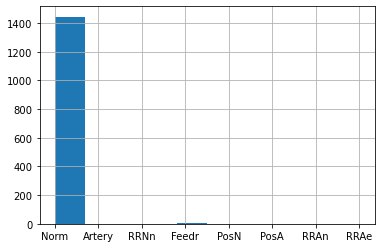

--------------------
Distribution of BldgType



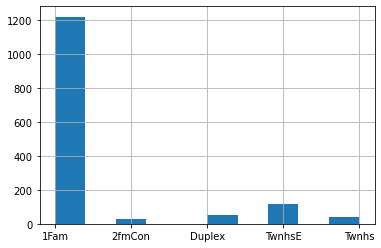

--------------------
Distribution of HouseStyle



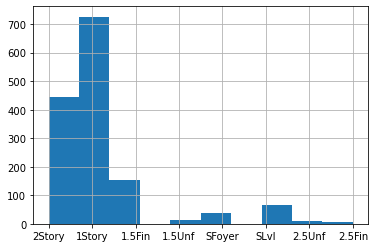

--------------------
Distribution of OverallQual



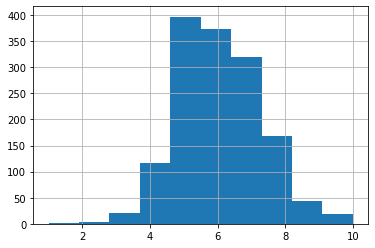

--------------------
Distribution of OverallCond



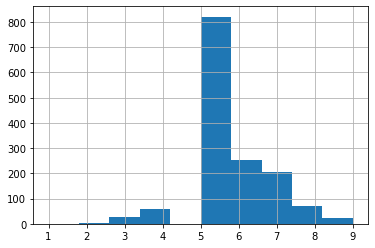

--------------------
Distribution of YearBuilt



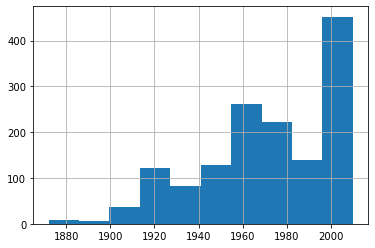

--------------------
Distribution of YearRemodAdd



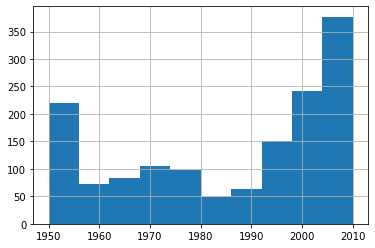

--------------------
Distribution of RoofStyle



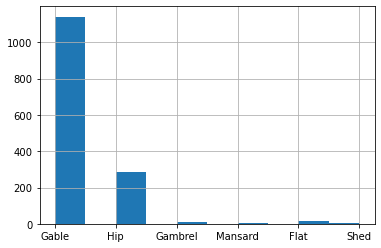

--------------------
Distribution of RoofMatl



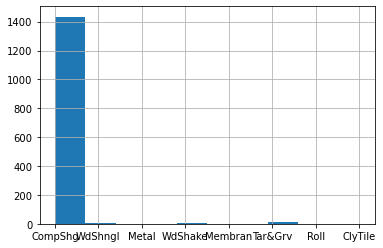

--------------------
Distribution of Exterior1st



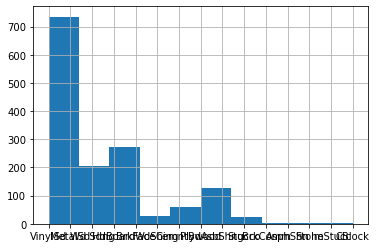

--------------------
Distribution of Exterior2nd



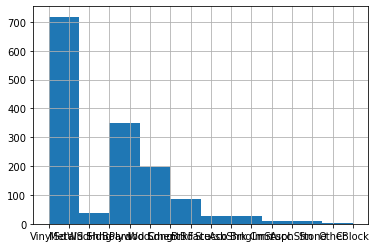

--------------------
Distribution of MasVnrType



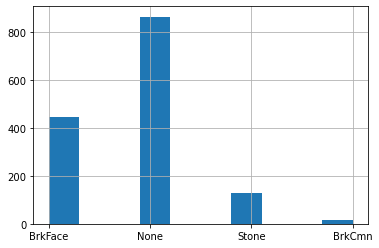

--------------------
Distribution of MasVnrArea



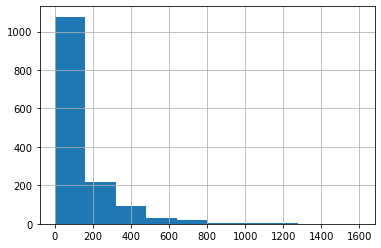

--------------------
Distribution of ExterQual



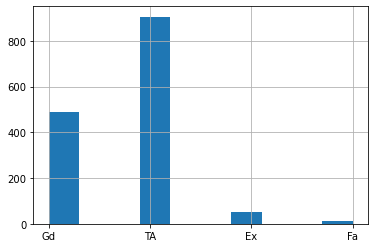

--------------------
Distribution of ExterCond



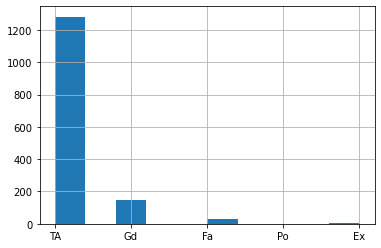

--------------------
Distribution of Foundation



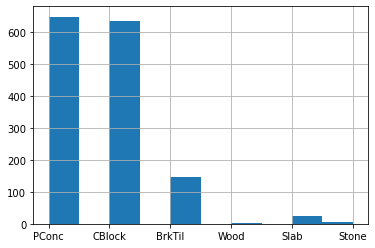

--------------------
Distribution of BsmtQual



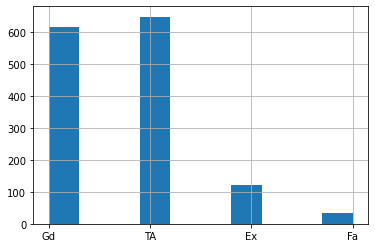

--------------------
Distribution of BsmtCond



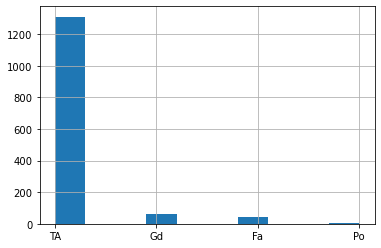

--------------------
Distribution of BsmtExposure



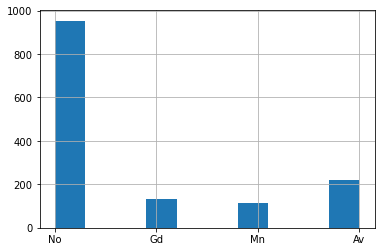

--------------------
Distribution of BsmtFinType1



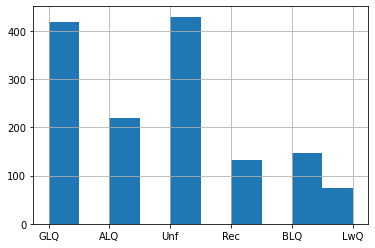

--------------------
Distribution of BsmtFinSF1



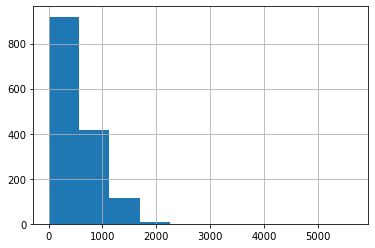

--------------------
Distribution of BsmtFinType2



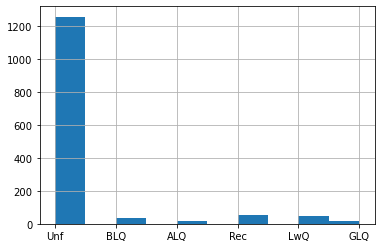

--------------------
Distribution of BsmtFinSF2



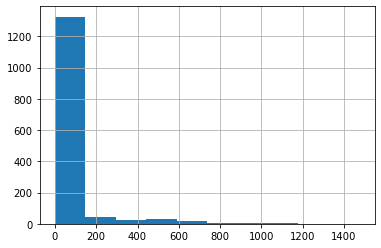

--------------------
Distribution of BsmtUnfSF



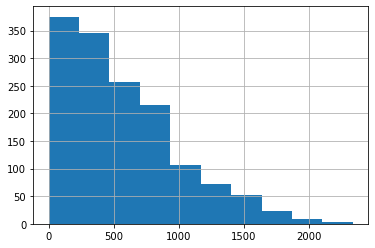

--------------------
Distribution of TotalBsmtSF



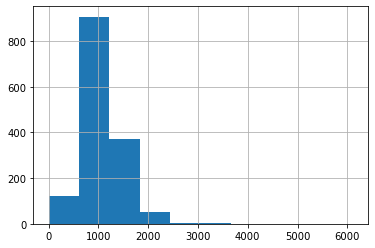

--------------------
Distribution of Heating



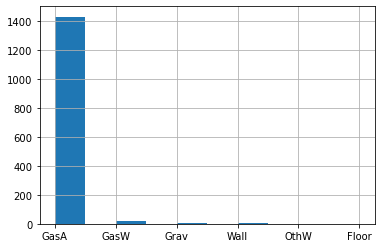

--------------------
Distribution of HeatingQC



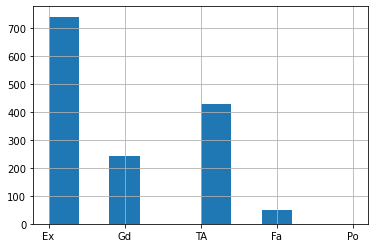

--------------------
Distribution of CentralAir



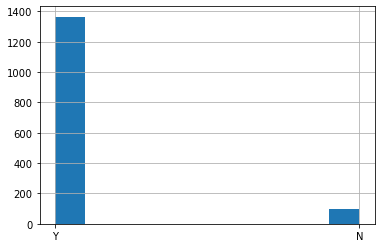

--------------------
Distribution of Electrical



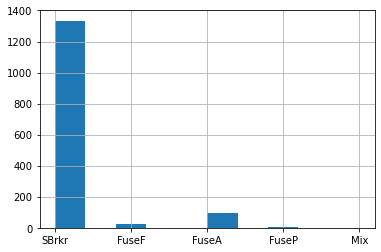

--------------------
Distribution of 1stFlrSF



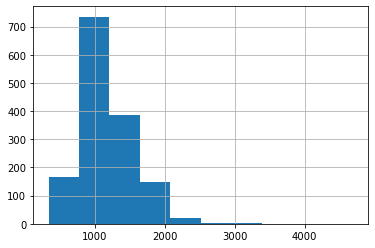

--------------------
Distribution of 2ndFlrSF



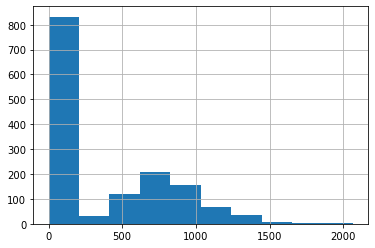

--------------------
Distribution of LowQualFinSF



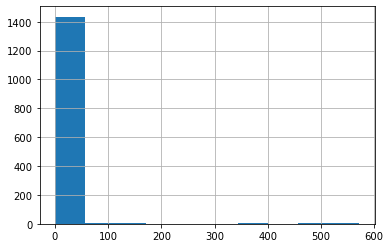

--------------------
Distribution of GrLivArea



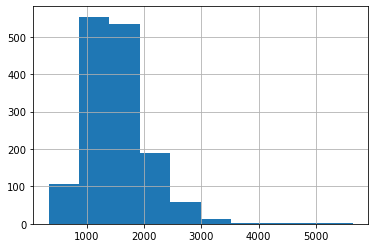

--------------------
Distribution of BsmtFullBath



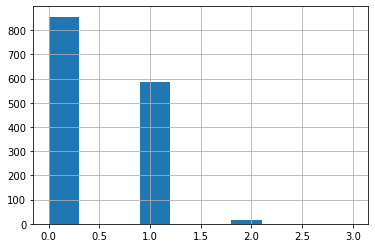

--------------------
Distribution of BsmtHalfBath



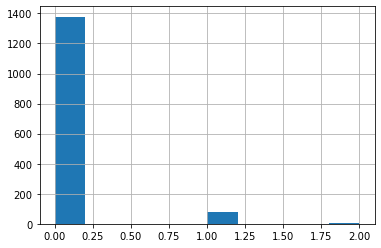

--------------------
Distribution of FullBath



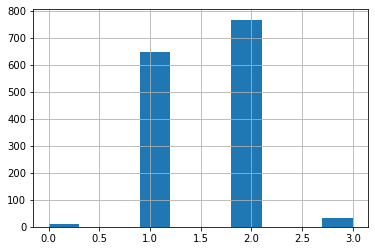

--------------------
Distribution of HalfBath



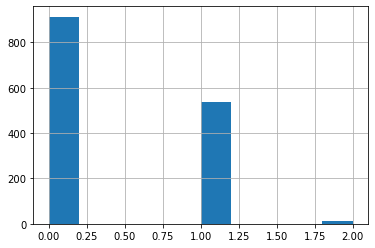

--------------------
Distribution of BedroomAbvGr



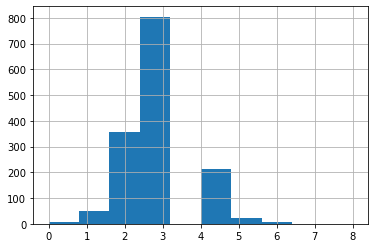

--------------------
Distribution of KitchenAbvGr



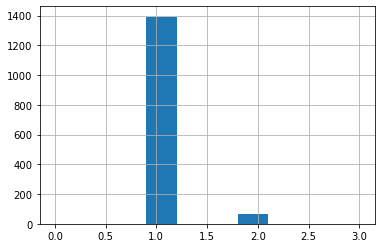

--------------------
Distribution of KitchenQual



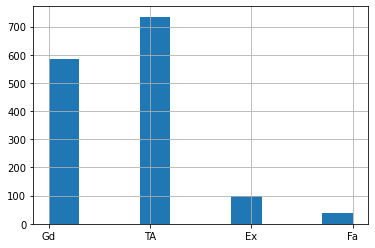

--------------------
Distribution of TotRmsAbvGrd



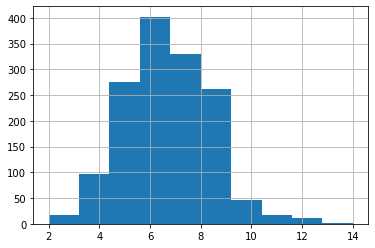

--------------------
Distribution of Functional



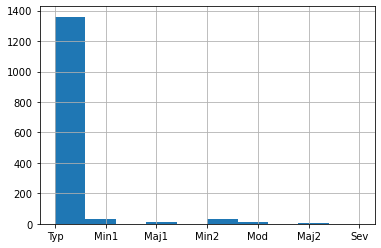

--------------------
Distribution of Fireplaces



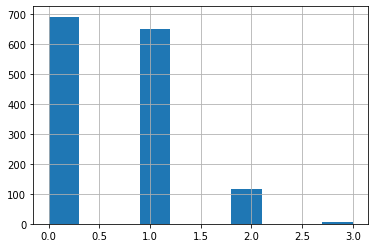

--------------------
Distribution of FireplaceQu



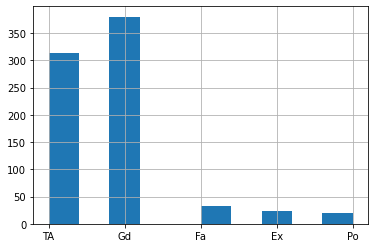

--------------------
Distribution of GarageType



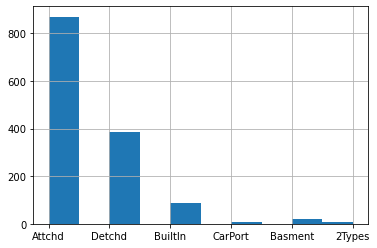

--------------------
Distribution of GarageYrBlt



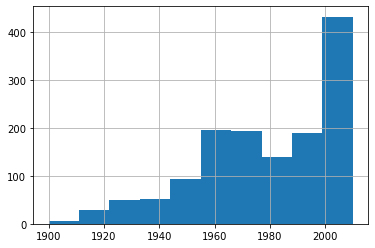

--------------------
Distribution of GarageFinish



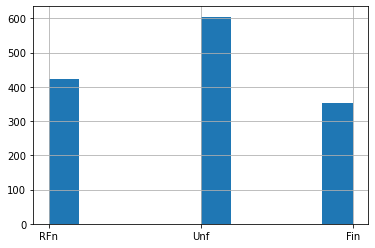

--------------------
Distribution of GarageCars



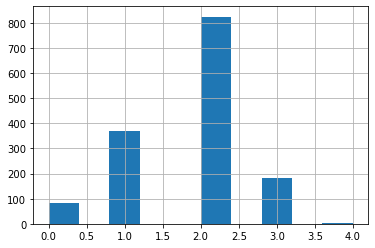

--------------------
Distribution of GarageArea



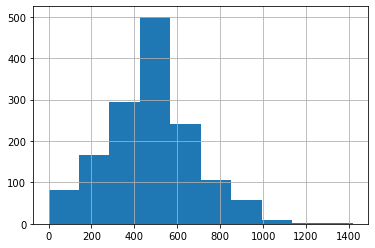

--------------------
Distribution of GarageQual



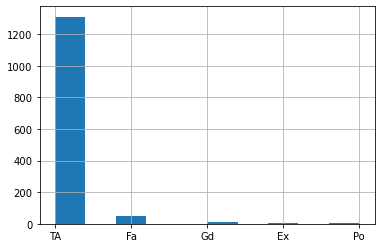

--------------------
Distribution of GarageCond



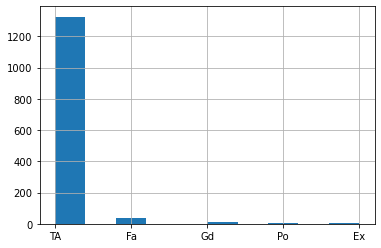

--------------------
Distribution of PavedDrive



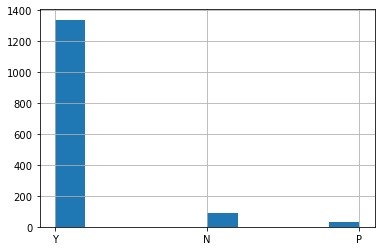

--------------------
Distribution of WoodDeckSF



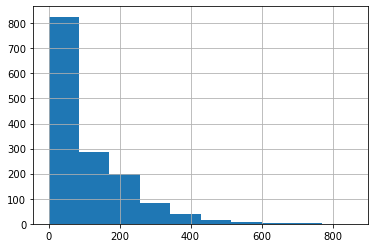

--------------------
Distribution of OpenPorchSF



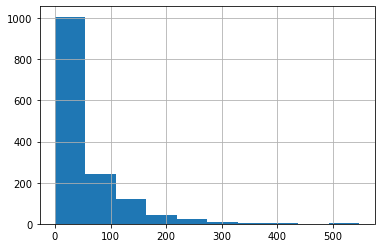

--------------------
Distribution of EnclosedPorch



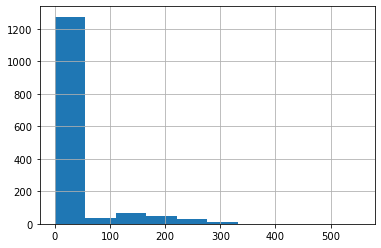

--------------------
Distribution of 3SsnPorch



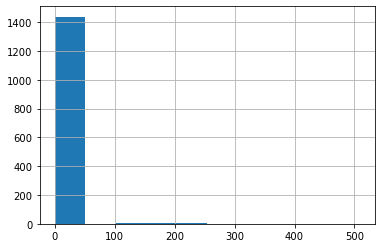

--------------------
Distribution of ScreenPorch



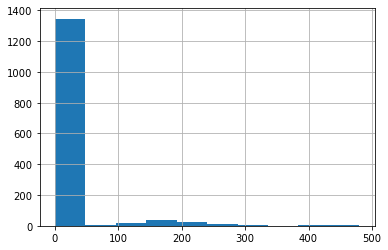

--------------------
Distribution of PoolArea



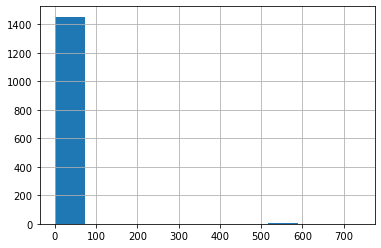

--------------------
Distribution of PoolQC



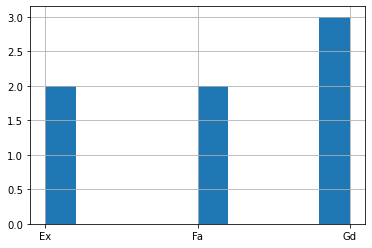

--------------------
Distribution of Fence



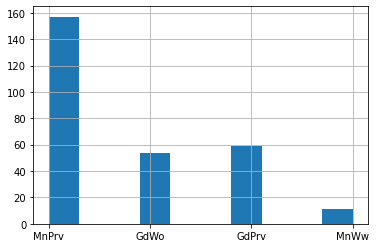

--------------------
Distribution of MiscFeature



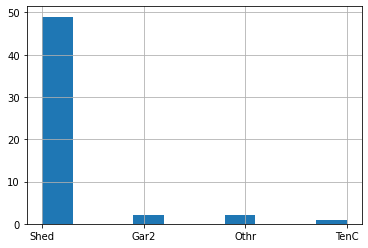

--------------------
Distribution of MiscVal



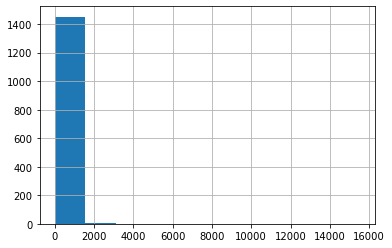

--------------------
Distribution of MoSold



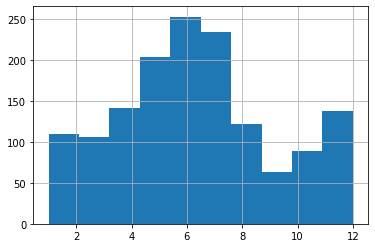

--------------------
Distribution of YrSold



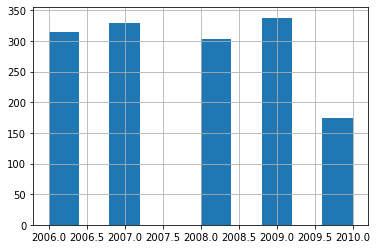

--------------------
Distribution of SaleType



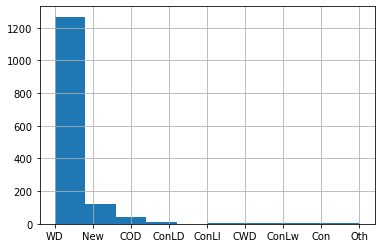

--------------------
Distribution of SaleCondition



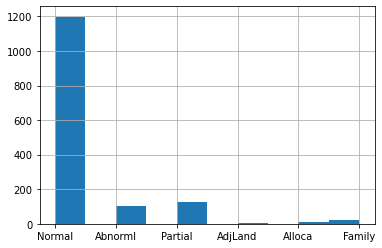

--------------------
Distribution of SalePrice



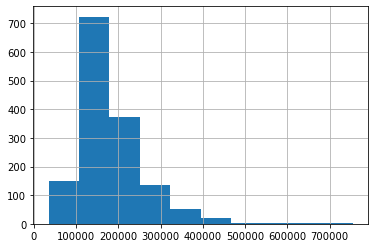

--------------------


In [7]:
a.univariate_distributions(df)

### Prepare

In [8]:
## we already checked for null values by doing the df.info() and we saw there
## were none so will now check for duplicate observations

df.duplicated().sum()

0

Having zero duplicate observations is great. This means I won't have to remove any rows. Let's take a look at the columns for null values.

In [9]:
df.info() ## going to remove the columns with too many null values for now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Using the prepare function to handle the column with high null values by removing them. The function will then drop the remaining null values within the dataset.

In [10]:
df = p.handle_nulls(df) ## using handle nulls function from prepare script

In [11]:
df.isnull().sum() ## quality assurance check on null values

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

The function has now removed all the nulls from the dataset, and the data is ready for splitting into the train, validate, and test datasets for exploration and modeling.

In [12]:
## using the prepare function to split the original df into train, validate, and test subsets

train, validate, test = p.split_data(df) ## <-- prepare split function

Making Sure Our Shapes Look Good
Train: (612, 75), Validate: (263, 75), Test: (219, 75)


In [13]:
train.head() ## previewing train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1118,20,RL,57.0,9764,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,130000
1000,20,RL,64.0,6762,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,206000
983,20,RL,43.0,3182,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,159895
643,80,RL,75.0,13860,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,345000
1070,45,RL,60.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,135000


In [14]:
validate.head() ## previewing validate

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
862,190,RL,75.0,11625,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,131500
142,20,RL,78.0,11645,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,260000
1179,50,RL,54.0,7681,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,102,0,0,0,0,7,2009,WD,Normal,154900
1190,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,189000
378,60,FV,102.0,11143,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2007,WD,Normal,340000


In [15]:
test.head() ## previewing test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1317,20,RL,61.0,10226,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2009,WD,Normal,295493
765,120,RL,30.0,9549,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,216,0,0,4,2006,WD,Normal,270000
297,50,RM,75.0,13710,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,152000
304,20,RL,70.0,9800,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2006,WD,Abnorml,149900
724,50,RL,60.0,8172,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,156,0,0,5,2008,WD,Normal,135000


Now that the dataframe is split into the train, validate, and test subsets it is ready for exploration before moving on to modeling.

### Explore

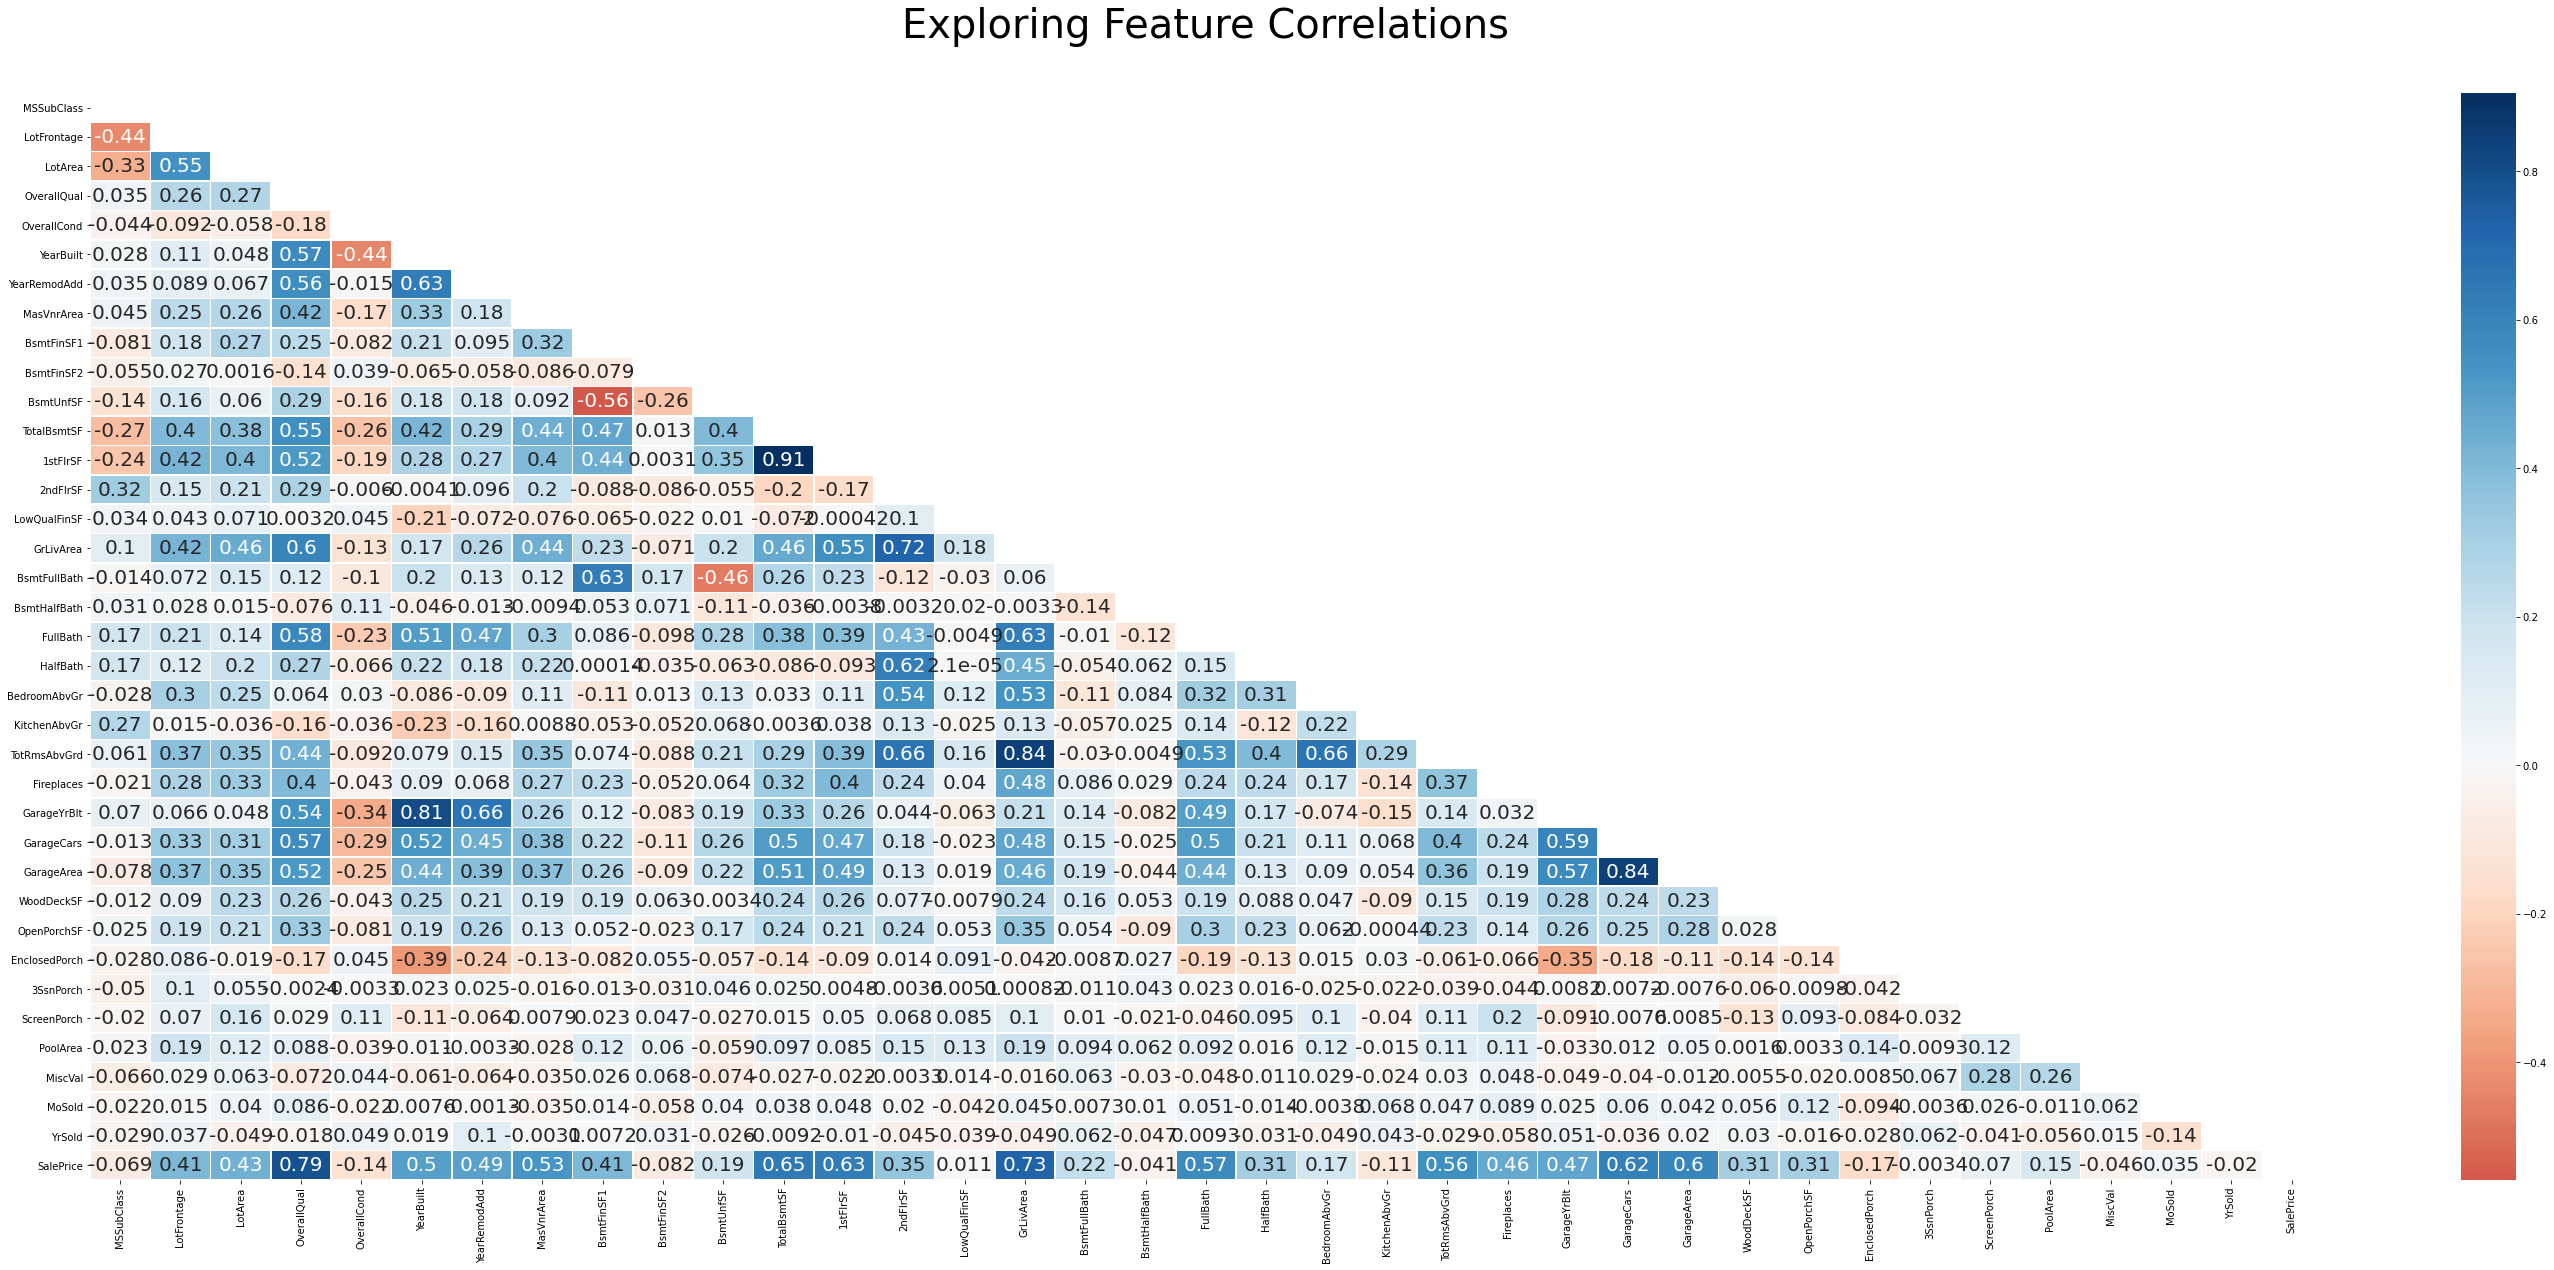

In [16]:
## defining correlation variable for heatmap
corr = train.corr()

## creating a heatmap of the correlation between all columns in our dataframe

plt.figure(figsize=(50,20))
mask = np.zeros_like(corr)  ## <-- creating a mask
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, center=0, annot=True, linewidths=.5, cmap='RdBu',
            annot_kws={"size": 20}, mask=mask)
plt.title('Exploring Feature Correlations\n', {'fontsize': 40})
plt.show()

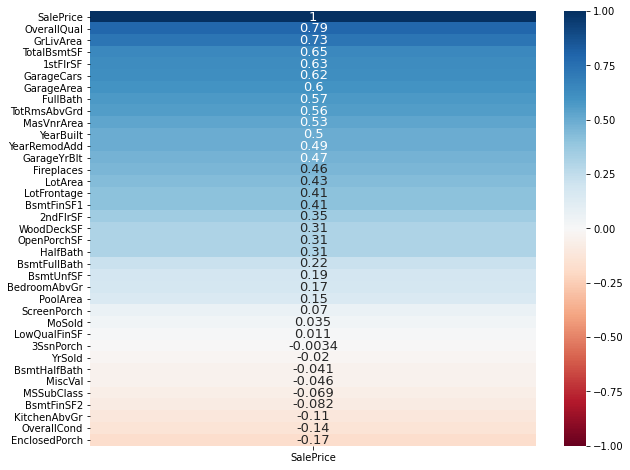

In [17]:
## making a heap map to look at correlations with is_fraud for the train data set
## helping me choose which features to use in my model

plt.figure(figsize = (10,8))  
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending = False), 
            cmap = 'RdBu', vmax = 1, vmin = -1, center = 0, annot = True, annot_kws={"size": 13} )
plt.show()

### Modeling 

The first thing before splitting into X and Y's for modeling is to build a list of strong features indicated from the heatmaps in exploration.

In [18]:
## list of strongly correlated features to SalePrice the target variable

correlation_list = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars',
                   'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'YearBuilt',
                   'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'LotArea', 'LotFrontage']

In [19]:
## Setting up X and y's by dropping target variable from X's and setting them to y

## also dropping unneccessary columns for predicting target variable


X_train, y_train = train[correlation_list], train.SalePrice
X_validate, y_validate = validate[correlation_list], validate.SalePrice
X_test, y_test = test[correlation_list], test.SalePrice

In [20]:
## previewing X splits
X_train.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,MasVnrArea,YearBuilt,YearRemodAdd,GarageYrBlt,Fireplaces,LotArea,LotFrontage
Id,,,,,,,,,,,,,,,
1118,5,894,894,894,2,450,1,5,0.0,1967,2003,1967.0,0,9764,57.0
1000,7,1208,1187,1208,2,632,2,6,24.0,2006,2006,2006.0,0,6762,64.0
983,7,1266,1266,1266,2,388,2,6,16.0,2007,2007,2007.0,1,3182,43.0
643,8,2704,1952,2000,2,538,2,9,0.0,1972,1995,1972.0,3,13860,75.0
1070,5,893,845,893,2,576,1,4,0.0,1949,2003,1985.0,0,9600,60.0


In [21]:
X_validate.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,MasVnrArea,YearBuilt,YearRemodAdd,GarageYrBlt,Fireplaces,LotArea,LotFrontage
Id,,,,,,,,,,,,,,,
862,5,1039,1039,1039,2,504,1,6,0.0,1965,1965,1965.0,0,11625,75.0
142,7,1734,1734,1734,2,660,2,7,0.0,2005,2005,2005.0,0,11645,78.0
1179,5,1343,731,820,1,186,1,7,0.0,1921,1950,1921.0,1,7681,54.0
1190,7,1804,994,1028,2,442,2,7,0.0,1999,1999,1999.0,1,7500,60.0
378,8,2466,1580,1580,2,610,3,8,0.0,2004,2005,2004.0,1,11143,102.0


In [22]:
X_test.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,MasVnrArea,YearBuilt,YearRemodAdd,GarageYrBlt,Fireplaces,LotArea,LotFrontage
Id,,,,,,,,,,,,,,,
1317,8,1630,1622,1630,3,860,2,8,270.0,2008,2008,2008.0,1,10226,61.0
765,8,1494,1494,1494,2,481,1,6,0.0,1995,1996,1995.0,1,9549,30.0
297,5,1558,910,910,1,282,1,6,0.0,1950,1950,1950.0,0,13710,75.0
304,5,894,894,894,2,552,1,5,0.0,1972,1972,1975.0,0,9800,70.0
724,4,1470,941,997,1,548,2,7,0.0,1954,1972,1958.0,0,8172,60.0


In [23]:
y_train.head() ## since the y was split with one column it turned into an array 

Id
1118    130000
1000    206000
983     159895
643     345000
1070    135000
Name: SalePrice, dtype: int64

In [24]:
## Turning all y's back into dataframes

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [25]:
y_train.head() ## quality assurance check

,SalePrice
Id,
1118,130000
1000,206000
983,159895
643,345000
1070,135000


Now that the strongly correlated features (x datasets) are seperated from the target (y datasets). The features (x datasets) are ready for recursive feature elimination. Which will select the best features to use for modeling in predicting the sale price of each property.

#### Recursive Feature Elimination

In [26]:
# call rfe function from explore script
features_to_use, feature_rankings = m.select_rfe(X_train, y_train, 10, return_rankings=True)

In [27]:
features_to_use ## previewing list of features selected

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'Fireplaces',
 'LotFrontage']

Now that recursive feature elimination has selected the best predicting features for the target. I am ready to begin modeling after establishing a mean or median baseline rmse to weigh against model predictions.

#### Establishing Baseline

In [28]:
## rating mean
SalePrice_pred_mean = y_train['SalePrice'].mean()
y_train['SalePrice_pred_mean'] = SalePrice_pred_mean
y_validate['SalePrice_pred_mean'] = SalePrice_pred_mean

## rating median
SalePrice_pred_median = y_train['SalePrice'].median()
y_train['SalePrice_pred_median'] = SalePrice_pred_median
y_validate['SalePrice_pred_median'] = SalePrice_pred_median

## RMSE of rating mean train and validate scores
rmse_train_mean = mean_squared_error(y_train.SalePrice, y_train.SalePrice_pred_mean)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate.SalePrice, y_validate.SalePrice_pred_mean)**(1/2)

print('Baseline')
print('-----------------------------')
print('RMSE using Mean\nTrain/In-Sample: ', round(rmse_train_mean, 4), 
      '\nValidate/Out-of-Sample: ', round(rmse_validate_mean, 4))
print('-----------------------------')

## RMSE of rating_pred_median train and validate scores
rmse_train_med = mean_squared_error(y_train.SalePrice, y_train.SalePrice_pred_median)**(1/2)
rmse_validate_med = mean_squared_error(y_validate.SalePrice, y_validate.SalePrice_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train_med, 4), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_med, 4))

## R squared score for baseline
print('-----------------------------')
r2_baseline = r2_score(y_validate.SalePrice, y_validate.SalePrice_pred_mean)
print(f'The R squared score for the baseline is {r2_baseline}')

Baseline
-----------------------------
RMSE using Mean
Train/In-Sample:  87635.0859 
Validate/Out-of-Sample:  78184.1996
-----------------------------
RMSE using Median
Train/In-Sample:  90129.8384 
Validate/Out-of-Sample:  80455.9502
-----------------------------
The R squared score for the baseline is -0.0006370715453183351


Now that I have calculated the mean and median baseline predictions for the sale price of each property. I'm going to use the mean baseline rmse to weigh against model predictions because it performed slightly better than the median baseline.

Before continuing on to modeling I will create a metrics dataframe by first adding the mean baseline rmse and later adding each model rmse for easy rmse comparison when finished modeling.

In [29]:
# create df to hold metrics
metrics_df = pd.DataFrame()

In [30]:
## adding our mean baseline to our metric dataframe
metrics_df = m.get_metrics(metrics_df, 'mean_baseline',rmse_validate_mean,explained_variance_score(y_validate.SalePrice, y_validate.SalePrice_pred_mean))

In [31]:
metrics_df ## previewing the first instance of metrics_df

,model,r^2_outofsample,rmse_outofsample
0,mean_baseline,0.0,78184.199567


Now that the mean baseline for validate has been added to the metrics dataframe. It is time to start modeling and adding their scores for comparison.

#### OLS: Linear Regression

In [32]:
# create the model object
lm = LinearRegression(fit_intercept=True)

## running function for train scores
rmse = m.run_model(lm, features_to_use, 'SalePrice', 'SalePrice_pred_lm', X_train, 
            y_train, 'OLS', 'Train')

RMSE for OLS using LinearRegression
Train/In-Sample: 41532.41876965586
------------------------------------------------
R squared score for OLS: 0.775395519563711


In [33]:
## running function for validate scores
rmse = m.run_model(lm, features_to_use, 'SalePrice', 'SalePrice_pred_lm', X_validate, 
            y_validate, 'OLS', 'Validate')

RMSE for OLS using LinearRegression
Validate/In-Sample: 38377.183006166255
------------------------------------------------
R squared score for OLS: 0.7589068972307538


In [34]:
## adding our OLS: Linear Regression scores to our metric dataframe
metrics_df = m.get_metrics(metrics_df, 'OLS',rmse,explained_variance_score(y_validate.SalePrice, y_validate.SalePrice_pred_lm))

In [35]:
metrics_df ## previewing score

,model,r^2_outofsample,rmse_outofsample
0,mean_baseline,0.000000,78184.199567
1,OLS,0.758907,38377.183006


#### Lasso Lars

In [36]:
# create the model object
lars = LassoLars(alpha=1)

## running function for train scores
rmse = m.run_model(lars, features_to_use, 'SalePrice', 'SalePrice_pred_lars', X_train,
           y_train, 'Lassor Lars', 'Train')

RMSE for Lassor Lars using LinearRegression
Train/In-Sample: 41532.65148509985
------------------------------------------------
R squared score for Lassor Lars: 0.7753930025382463


In [37]:
## running function for validate scores
rmse = m.run_model(lars, features_to_use, 'SalePrice', 'SalePrice_pred_lars', X_validate,
           y_validate, 'Lassor Lars', 'Validate')

RMSE for Lassor Lars using LinearRegression
Validate/In-Sample: 38377.28112424017
------------------------------------------------
R squared score for Lassor Lars: 0.7589056644346357


In [38]:
## adding our Lasso Lars scores to our metric dataframe
metrics_df = m.get_metrics(metrics_df, 'Lasso Lars',rmse,explained_variance_score(y_validate.SalePrice, y_validate.SalePrice_pred_lars))

In [39]:
metrics_df ## previewing scores

,model,r^2_outofsample,rmse_outofsample
0,mean_baseline,0.000000,78184.199567
1,OLS,0.758907,38377.183006
2,Lasso Lars,0.758906,38377.281124


#### Tweedie Regressor

In [40]:
# create the model object
glm = TweedieRegressor(power=0, alpha=1)

## running function for train scores
rmse = m.run_model(glm, features_to_use, 'SalePrice', 'SalePrice_pred_glm', X_train,
           y_train, 'Tweedie Regressor', 'Train')

RMSE for Tweedie Regressor using LinearRegression
Train/In-Sample: 46914.25725812953
------------------------------------------------
R squared score for Tweedie Regressor: 0.7134148672022319


In [41]:
## running function for validate scores
rmse = m.run_model(glm, features_to_use, 'SalePrice', 'SalePrice_pred_glm', X_validate,
           y_validate, 'Tweedie Regressor', 'Validate')

RMSE for Tweedie Regressor using LinearRegression
Validate/In-Sample: 43933.91959002102
------------------------------------------------
R squared score for Tweedie Regressor: 0.6840353463991269


In [42]:
## adding our Tweedie Regressor scores to our metric dataframe
metrics_df = m.get_metrics(metrics_df, 'Tweedie Regressor',rmse,explained_variance_score(y_validate.SalePrice, y_validate.SalePrice_pred_glm))

In [43]:
metrics_df ## previewing scores

,model,r^2_outofsample,rmse_outofsample
0,mean_baseline,0.000000,78184.199567
1,OLS,0.758907,38377.183006
2,Lasso Lars,0.758906,38377.281124
3,Tweedie Regressor,0.684039,43933.919590


#### 2nd Degree Polynomial

In [44]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled features
X_train_degree2 = pf.fit_transform(X_train[features_to_use])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[features_to_use])
X_test_degree2 = pf.transform(X_test[features_to_use])

In [45]:
#create the model object
pm = LinearRegression(normalize=True)

## running function for train scores
rmse = m.run_model(pm, features_to_use, 'SalePrice', 'SalePrice_pred_pm', X_train,
           y_train, '2nd degree Polynomial', 'Train')

RMSE for 2nd degree Polynomial using LinearRegression
Train/In-Sample: 41532.41876965586
------------------------------------------------
R squared score for 2nd degree Polynomial: 0.775395519563711


In [46]:
## running function for validate scores
rmse = m.run_model(pm, features_to_use, 'SalePrice', 'SalePrice_pred_pm', X_validate,
           y_validate, '2nd degree Polynomial', 'Validate')

RMSE for 2nd degree Polynomial using LinearRegression
Validate/In-Sample: 38377.18300616623
------------------------------------------------
R squared score for 2nd degree Polynomial: 0.7589068972307541


In [47]:
## adding our OLS: Linear Regression scores to our metric dataframe
metrics_df = m.get_metrics(metrics_df, '2nd Degree Polynomial',rmse,explained_variance_score(y_validate.SalePrice, y_validate.SalePrice_pred_pm))

In [48]:
metrics_df ## previewing all scores

,model,r^2_outofsample,rmse_outofsample
0,mean_baseline,0.000000,78184.199567
1,OLS,0.758907,38377.183006
2,Lasso Lars,0.758906,38377.281124
3,Tweedie Regressor,0.684039,43933.919590
4,2nd Degree Polynomial,0.758907,38377.183006


Looking at the scores for all the models I can see that OLS and 2nd Degree Polynomial Regression performed the best with an RMSE of about $38,000 and an r-squared score of about 76 percent.

Let's use the OLS: Linear Regression model for the out of sample data the test dataframe and see how it scores.

#### Testing OLS: Linear Regression

In [49]:
## running function for validate scores
rmse = m.run_model(lm, features_to_use, 'SalePrice', 'SalePrice_pred_lm', X_test,
           y_test, 'OLS: Linear Regression', 'Test')

RMSE for OLS: Linear Regression using LinearRegression
Test/In-Sample: 34780.26484803315
------------------------------------------------
R squared score for OLS: Linear Regression: 0.7863353521831808


In [50]:
## adding our OLS: Linear Regression scores to our metric dataframe
metrics_df = m.get_metrics(metrics_df, 'OLS Test',rmse,explained_variance_score(y_test.SalePrice, y_test.SalePrice_pred_lm))

In [51]:
metrics_df ## previewing the comparison between tested and validate scores

,model,r^2_outofsample,rmse_outofsample
0,mean_baseline,0.000000,78184.199567
1,OLS,0.758907,38377.183006
2,Lasso Lars,0.758906,38377.281124
3,Tweedie Regressor,0.684039,43933.919590
4,2nd Degree Polynomial,0.758907,38377.183006
5,OLS Test,0.786335,34780.264848


### Visualizing Residuals

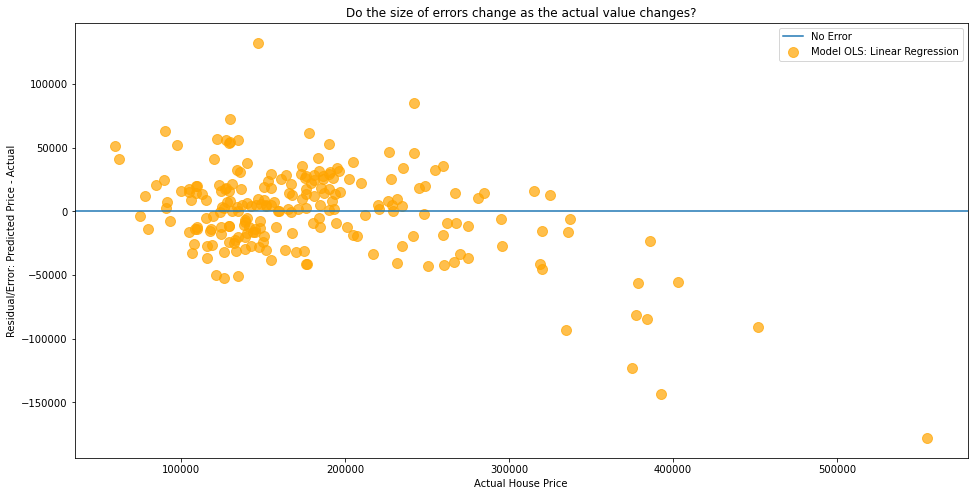

In [52]:
# plot the residuals for the best performing model

plt.figure(figsize=(16,8))
plt.axhline(label="No Error")

plt.scatter(y_test.SalePrice, y_test.SalePrice_pred_lm - y_test.SalePrice, 
            alpha=.7, color="orange", s=100, label="Model OLS: Linear Regression")
plt.legend()
plt.xlabel("Actual House Price")
plt.ylabel("Residual/Error: Predicted Price - Actual")
plt.title("Do the size of errors change as the actual value changes?")

plt.show()

### Visualizing Actual vs Predicted Values

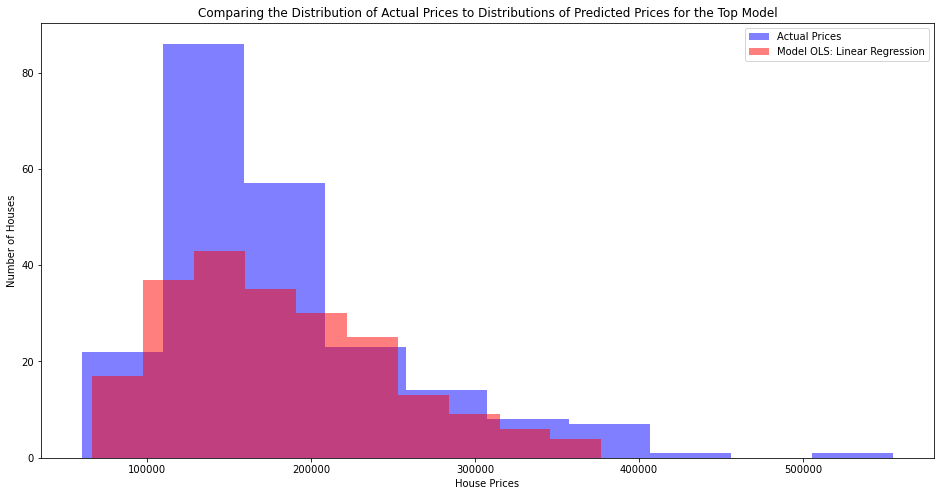

In [53]:
# plot to visualize actual vs predicted values
plt.figure(figsize=(16,8))
plt.hist(y_test.SalePrice, color='blue', alpha=.5, label="Actual Prices")
plt.hist(y_test.SalePrice_pred_lm, color='red', alpha=.5, label="Model OLS: Linear Regression")
plt.xlabel("House Prices")
plt.ylabel("Number of Houses")
plt.title("Comparing the Distribution of Actual Prices to Distributions of Predicted Prices for the Top Model")
plt.legend()
plt.show()

### Final Takeaways & Modeling Takeaways
Recursive feature elimination was used to determine the best features for regression modeling. The features used in modeling were:

 - OverallQual
- GrLivArea
- GarageCars
- FullBath
- TotRmsAbvGrd
- YearBuilt
- YearRemodAdd
- GarageYrBlt
- Fireplaces
- LotFrontage

The features that had the strongest correlation the price of a used bmw were mileage, engine size, year manufactured, and whether or not the vehicle was automatic or manual.

In the regression modeling the best performing model in train and validate was the OLS: Linear Regression model.

Therfore it was used on the out-of-sample dataframe (test dataframe) and came our with the following scores:

OLS: Linear Regression

RMSE: 5121.33
R-squared: 0.80
In Conclusion, the regression model that was tested explians every 80 cents on the dollar for predicting price of a used BMW.

This model can used as a baseline for bmw dealerships to work together to create equal pricing in their vehicles for a more satisfied customer base.